# Task 1: NLTK exercise

### Q1-1 载入Gutenberg语料库

In [1]:
from nltk.corpus import gutenberg as gb
# 查看包含哪些语料
gb.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# 可以看到需要用到的austen-emma.txt包含在该语料库中
# 获取austen-emma.txt的word tokens
word_list = gb.words('austen-emma.txt')
word_list[0:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

### Q1-3 sents(string):把文本化成句子，每一个句子是词链表

In [3]:
sent_list = gb.sents('austen-emma.txt')
sent_list

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

### Q2-1 获取romance语料

In [4]:
import nltk
from nltk.corpus import brown

In [5]:
romance_word_list = brown.words(categories='romance')
romance_freqdist = nltk.FreqDist([ w.lower() for w in romance_word_list ])

In [6]:
# 查看rank5
romance_freqdist.most_common(5)

[(',', 3899), ('.', 3736), ('the', 2988), ('and', 1905), ('to', 1517)]

### Q3-1 wordnet

WordNet与一般字典的不同在于组织结构的不同，它是以同义词集合(Synset)作为基本的构建单位来组织的，用户可以在同义词集合中找到一个合适的词去表达一个已知的概念。与传统词典类似的是它也给出了定义和例句。

In [7]:
from nltk.corpus import wordnet as wn
# wn.synsets(word) 查询一个词所在的所有词集
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [8]:
# 如上，Synset由三部分组成，第一部分是词义，第二部分是词性，第三部分是编号。
# 查询一条synset的定义
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [9]:
# 查询一条synset的例句
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [10]:
# 查询一条synset有几个同义词
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [11]:
# 查询每个同义词的写法
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [12]:
# 查询car在每个synset的同义词
for synset in wn.synsets('car'):
    print(' '.join(synset.lemma_names()))

car auto automobile machine motorcar
car railcar railway_car railroad_car
car gondola
car elevator_car
cable_car car


### Q3-2 下位词hyponyms

In [13]:
from nltk.corpus import wordnet as wn
car_synsets = wn.synsets("car")
car_synsets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [14]:
car_hyponyms_synsets = wn.synset('car.n.01').hyponyms()
for hy in car_hyponyms_synsets:
    print(hy.lemma_names())

['ambulance']
['beach_wagon', 'station_wagon', 'wagon', 'estate_car', 'beach_waggon', 'station_waggon', 'waggon']
['bus', 'jalopy', 'heap']
['cab', 'hack', 'taxi', 'taxicab']
['compact', 'compact_car']
['convertible']
['coupe']
['cruiser', 'police_cruiser', 'patrol_car', 'police_car', 'prowl_car', 'squad_car']
['electric', 'electric_automobile', 'electric_car']
['gas_guzzler']
['hardtop']
['hatchback']
['horseless_carriage']
['hot_rod', 'hot-rod']
['jeep', 'landrover']
['limousine', 'limo']
['loaner']
['minicar']
['minivan']
['Model_T']
['pace_car']
['racer', 'race_car', 'racing_car']
['roadster', 'runabout', 'two-seater']
['sedan', 'saloon']
['sport_utility', 'sport_utility_vehicle', 'S.U.V.', 'SUV']
['sports_car', 'sport_car']
['Stanley_Steamer']
['stock_car']
['subcompact', 'subcompact_car']
['touring_car', 'phaeton', 'tourer']
['used-car', 'secondhand_car']


### Q3-3 similarity

In [15]:
# 计算两个synset的相似度方法之一
synset_names = ['right_whale.n.01', 'novel.n.01']
synsets = [wn.synset(sn) for sn in synset_names]

In [16]:
sims = [synsets[0].lch_similarity(sn) for sn in synsets ]
sims

[3.6375861597263857, 0.5020919437972361]

# Task 2

In [17]:
# import numpy as np
# from math import sqrt, log
# from itertools import chain
# from collections import defaultdict

# 将给定的corpus表示为BOW
# Bag-of-words模型介绍参考：https://zhuanlan.zhihu.com/p/29933242
def calculate_bow(corpus):
    def vectorize(sentence, vocab):
        return [sentence.split().count(i) for i in vocab]

    vectorized_corpus = []
    vocab = sorted(set([token for doc in corpus for token in doc.lower().split()]))
    for i in corpus:
        vectorized_corpus.append((i, vectorize(i, vocab)))
    return vectorized_corpus, vocab

def q1():
    all_sents = ["this is a foo bar",
                 "foo bar bar black sheep",
                 "this is a sentence"]
    corpus_bow, vocab = calculate_bow(all_sents)
    print(corpus_bow)
    print(vocab)

In [18]:
q1()

[('this is a foo bar', [1, 1, 0, 1, 1, 0, 0, 1]), ('foo bar bar black sheep', [0, 2, 1, 1, 0, 0, 1, 0]), ('this is a sentence', [1, 0, 0, 0, 1, 1, 0, 1])]
['a', 'bar', 'black', 'foo', 'is', 'sentence', 'sheep', 'this']


# Task 3

In [19]:
# 验证齐夫定律 Zipf's lab
# 依据NLTK提供的Gutenberg语料库进行验证
from nltk.corpus import brown,gutenberg
from collections import Counter

In [20]:
puncs = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
word_list_gutenberg = (x.lower() for x in gutenberg.words() if x not in puncs)

token_counts_gutenberg = Counter(word_list_gutenberg)
print(token_counts_gutenberg.most_common(20))

[('the', 133583), ('and', 95442), ('of', 71267), ('to', 48057), ('a', 33960), ('in', 33580), ('i', 30265), ('that', 28798), ('he', 25857), ('it', 22303), ('his', 21402), ("'", 19873), ('for', 19527), ('was', 18715), ('with', 17599), ('not', 17373), ('is', 16435), ('you', 16398), ('be', 16115), ('"', 15422)]


布朗语料库中的词频符合齐普夫预测的对数线性关系如果把语料库的词按照出现次数按降序排列，我们会发现：对一个足够大的样本，出现次数排名第一的词在语料库中的出现次数是排名第二的词的两倍，是排名第四的词的 4 倍。因此，给定一个大型语料库，可以用上述数字来粗略统计给定词出现在该语料库的任何给定文档中的可能性。

In [21]:
freq_gutenberg = []
for word in token_counts_gutenberg:
    freq_gutenberg.append(token_counts_gutenberg[word])
freq_gutenberg.sort(reverse=True)

freq1 = freq_gutenberg[:200]
x = [i for i in range(1,201)]

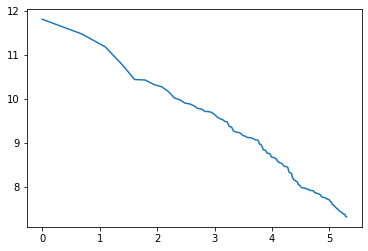

In [24]:
# 载入作图包 matplotlib
import matplotlib.pyplot as plt
import math

plt.plot([math.log(i) for i in x], [math.log(y) for y in freq1])